> ### Roham Jabbari
>
> ### a12211638

### Task - 2: Dimensionality Reduction, Principal Component Analysis via SVD (Complete)

#### Libraries used:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
sb.set_style('darkgrid')

#### Loading data:

> Read files using Pandas dataframes:

In [2]:

address = ""

In [3]:
df = pd.read_csv(address + "seeds.csv")

In [4]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
Y = df.loc[:,'Type']

In [6]:
X = df.iloc[:, 0:-1]

In [7]:
X.shape

(199, 7)

> The following function normalizes the data using standard deviations:

In [8]:
def dataNormalize(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0) 
    data_std[data_std == 0] = 1
    data_norm = (data - data_mean)/data_std
    return data_norm

> Normalized data is used with Numpy's SVD to get the elements:

In [9]:
X_norm = dataNormalize(X)
svd = np.linalg.svd
U, Sigma, VT = svd(X_norm, full_matrices=False)
pc_directions = -1*VT[:2].T

In [10]:
pc_directions.shape

(7, 2)

In [11]:
pc_directions

array([[ 0.44444526, -0.0268951 ],
       [ 0.44156742, -0.08298812],
       [ 0.27791499,  0.52535969],
       [ 0.42412605, -0.200075  ],
       [ 0.43293659,  0.11572453],
       [-0.1157433 , -0.72122562],
       [ 0.38669933, -0.37788656]])

> PC1 and PC2 are projected on the data:

In [12]:
X_projected = np.dot(X_norm,pc_directions)

In [13]:
X_projected.shape

(199, 2)

In [14]:
scratchVar = np.var(X_projected, axis=0)
scratchVarRatio = np.round(Sigma**2/np.sum(Sigma**2), decimals=8)[:2]


> Note: I find it easier to plot data using DataFrames:

In [15]:
mydf = pd.DataFrame(data = X_projected, columns = ['PC1', 'PC2'])
mydf = pd.concat([mydf , pd.DataFrame(Y)] , axis = 1)

> plot for PCA via SVD:

Text(0.5, 1.0, 'PCA from scratch via SVD')

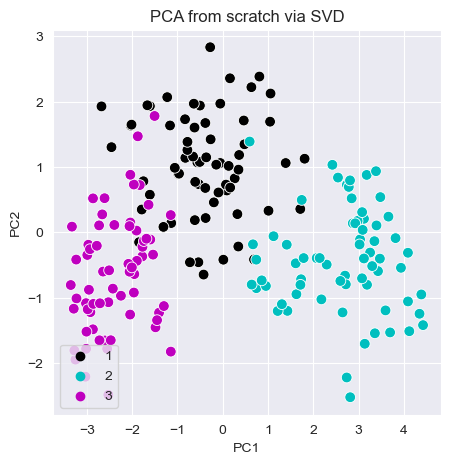

In [16]:
n=5
plt.figure(figsize = (n,n))
# sb.set(rc={"figure.figsize":(n, n)})
sb.scatterplot(data = mydf , x = 'PC1',y = 'PC2' , hue = 'Type' , s = 60 , palette= ['k','c','m'])
plt.legend(loc='lower left')
plt.title("PCA from scratch via SVD")

> PCA via SVD using sklearn:

In [17]:
pca = PCA(n_components=2, svd_solver='full')
principalComponents = pca.fit_transform(X_norm)

In [18]:
skVar = pca.explained_variance_
skVarRatio = pca.explained_variance_ratio_

In [19]:
skdf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
skdf = pd.concat([skdf , pd.DataFrame(Y)] , axis = 1)

> PCA via SVD using sklearn package:

Text(0.5, 1.0, 'PCA from sklearn')

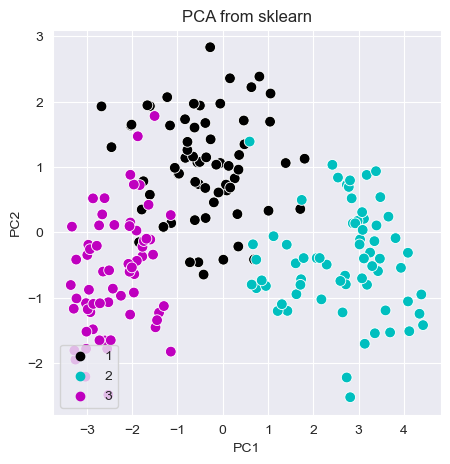

In [20]:
plt.figure(figsize = (n,n))
# sb.set(rc={"figure.figsize":(n, n)})
sb.scatterplot(data = skdf , x = 'PC1',y = 'PC2' , hue = 'Type' , s = 60 , palette= ['k','c','m'])
plt.legend(loc='lower left')
plt.title("PCA from sklearn")

## Comparision:

In [21]:
print("From scratch variance: \n\t", scratchVar)
print("sklearn variance: \n\t", skVar)
print("\nFrom scratch variance ratio: \n\t", scratchVarRatio)
print("sklearn variance ratio: \n\t", skVarRatio)

From scratch variance: 
	 [5.03150613 1.19913412]
sklearn variance: 
	 [5.05691778 1.20519035]

From scratch variance ratio: 
	 [0.71878659 0.17130487]
sklearn variance ratio: 
	 [0.71878659 0.17130487]


> PCA from scratch, no SVD:

In [22]:
n_components = 2

X_meaned = X_norm - np.mean(X_norm , axis = 0) 

cov_mat = np.cov(X_meaned , rowvar = False)     
    
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)        

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]    
 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
     
X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

In [23]:
principal_df = pd.DataFrame(X_reduced , columns = ['PC1','PC2'])
principal_df = principal_df*-1
principal_df = pd.concat([principal_df , pd.DataFrame(Y)] , axis = 1)

In [24]:
principal_df

,PC1,PC2,Type
0,0.263729,0.826502,1
1,-0.053864,1.970462,1
2,-0.503663,1.940830,1
3,-0.637717,1.969545,1
4,1.054848,2.124991,1
...,...,...,...
194,-2.037896,0.881490,3
195,-2.778063,-0.205400,3
196,-1.449167,-1.344173,3
197,-2.391369,0.113144,3


> Plot for PCA no SVD:

Text(0.5, 1.0, 'PCA from scratch, no SVD')

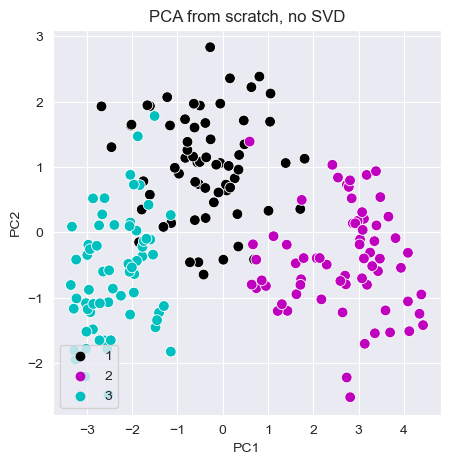

In [25]:
plt.figure(figsize = (n,n))
# sb.set(rc={"figure.figsize":(n, n)})
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'Type' , s = 60 , palette= ['k','m','c'])
plt.legend(loc='lower left')
plt.title("PCA from scratch, no SVD")

> All three plots for easier comparision:

Text(0.5, 1.0, 'PCA from scratch via SVD')

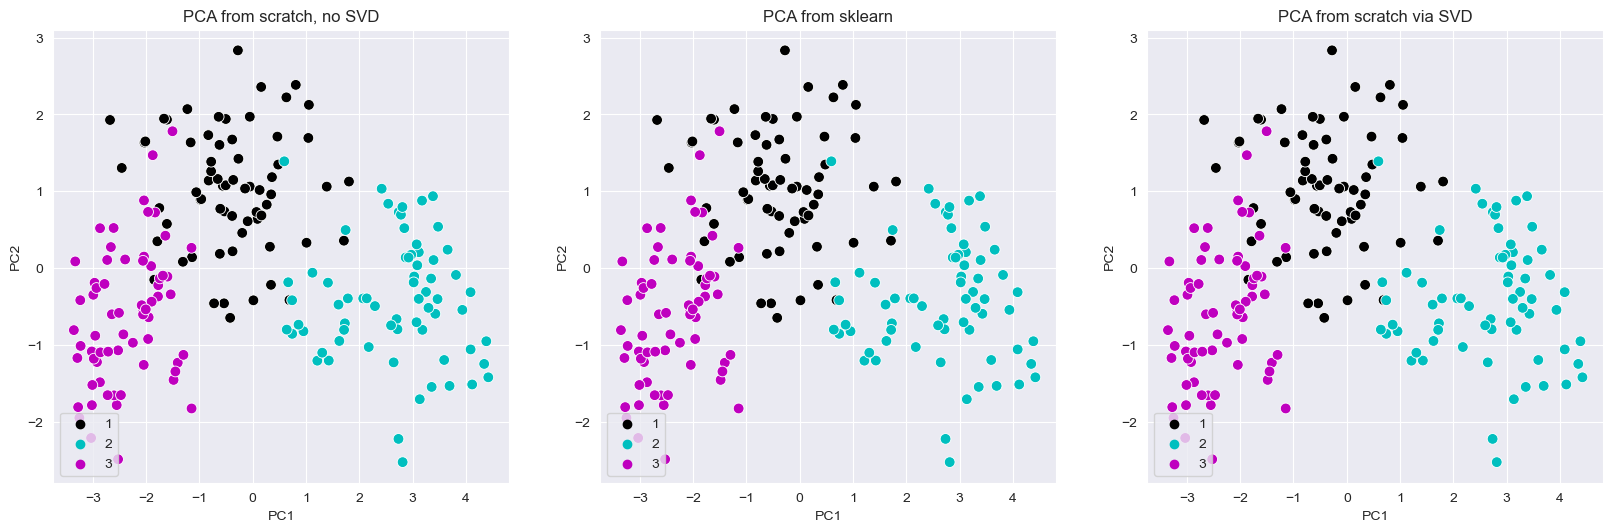

In [26]:
n=20
fig = plt.figure(figsize=(n,n))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(3, 3, 1)
# sb.set(rc={"figure.figsize":(n, n)})
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'Type' , s = 60 , palette= ['k','c','m'], ax=ax)
plt.legend(loc='lower left')
plt.title("PCA from scratch, no SVD")

ax = fig.add_subplot(3, 3, 2)
# sb.set(rc={"figure.figsize":(n, n)})
sb.scatterplot(data = skdf , x = 'PC1',y = 'PC2' , hue = 'Type' , s = 60 , palette= ['k','c','m'], ax=ax)
plt.legend(loc='lower left')
plt.title("PCA from sklearn")

ax = fig.add_subplot(3, 3, 3)
# sb.set(rc={"figure.figsize":(n, n)})
sb.scatterplot(data = mydf , x = 'PC1',y = 'PC2' , hue = 'Type' , s = 60 , palette= ['k','c','m'], ax=ax)
plt.legend(loc='lower left')
plt.title("PCA from scratch via SVD")

##The Curse Of Dimensionality:

> The curse of dimensionality basically means that the error increases with the increase in the number of features. It refers to the fact that algorithms are harder to design in high dimensions and often have a running time exponential in the dimensions.  

> The feasible solution to this problem would be dimensionality reduction.One of the dimensionality reduction technique is Principle Component Analysis(PCA).

## Source:

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8  
https://scikit-learn.org/stable/